Using the CIFAR-10 dataset, train a Convolutional Neural Network to classify images. The model should have at least 3 convolutional layers and 2 fully connected layers. Evaluate the model's performance on a validation set and report the accuracy. Finally, use the model to classify a few sample images from the test set and report the predictions.
 
 
Upload the code and output screenshots in github and share me the link on or before 16th April. No extensions will be given. Those who submit plagiarised code will not get any marks for the CIA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, losses
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Parameters
batch_size = 64
num_classes = 10
epochs = 10
learning_rate = 0.1

In [2]:
# Import data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between -1 and 1
train_images = (train_images / 255.0) - 0.5
test_images = (test_images / 255.0) - 0.5

In [3]:
print(train_images.shape) # no.if images AND input shape (32x32x3)
print(train_images[0].shape)

(50000, 32, 32, 3)
(32, 32, 3)


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [5]:
# model.compile(optimizer = optimizers.Adam(learning_rate=learning_rate),
#               loss = losses.CategoricalCrossentropy(),
#               metrics=['accuracy'])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_images, to_categorical(train_labels), epochs = epochs, batch_size = batch_size, validation_data =(test_images, to_categorical(test_labels)))

Epoch 1/10
782/782 [==============================] - 99s 124ms/step - loss: 1.5932 - accuracy: 0.4166 - val_loss: 1.3069 - val_accuracy: 0.5245
Epoch 2/10
782/782 [==============================] - 92s 117ms/step - loss: 1.1954 - accuracy: 0.5739 - val_loss: 1.1101 - val_accuracy: 0.6095
Epoch 3/10
782/782 [==============================] - 87s 111ms/step - loss: 1.0221 - accuracy: 0.6413 - val_loss: 1.0112 - val_accuracy: 0.6420
Epoch 4/10
782/782 [==============================] - 85s 109ms/step - loss: 0.9043 - accuracy: 0.6868 - val_loss: 0.9688 - val_accuracy: 0.6630
Epoch 5/10
782/782 [==============================] - 91s 116ms/step - loss: 0.8214 - accuracy: 0.7143 - val_loss: 0.9511 - val_accuracy: 0.6702
Epoch 6/10
782/782 [==============================] - 86s 110ms/step - loss: 0.7463 - accuracy: 0.7393 - val_loss: 0.9009 - val_accuracy: 0.6977
Epoch 7/10
782/782 [==============================] - 86s 110ms/step - loss: 0.6865 - accuracy: 0.7629 - val_loss: 0.8350 - val_ac

In [7]:
score = model.evaluate(test_images, to_categorical(test_labels), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8768362402915955
Test accuracy: 0.7164000272750854


1/1 [==============================] - 0s 116ms/step


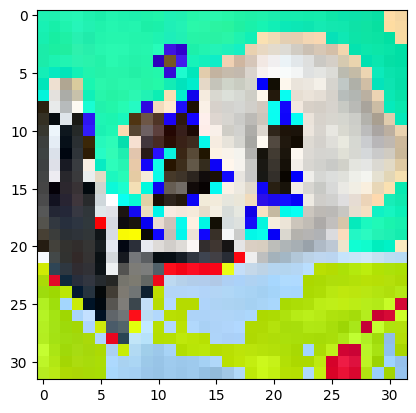

Actual label: [3]
Predicted label: 3





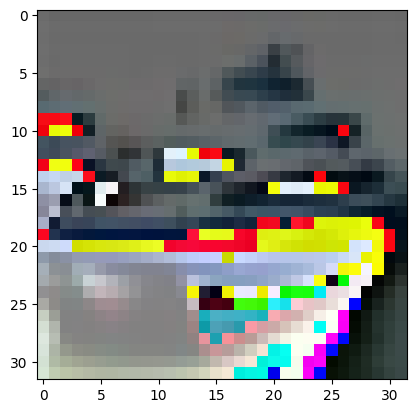

Actual label: [8]
Predicted label: 8





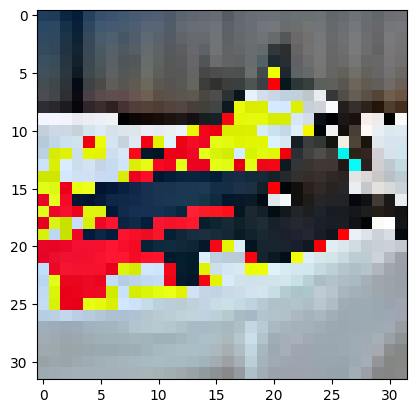

Actual label: [8]
Predicted label: 8





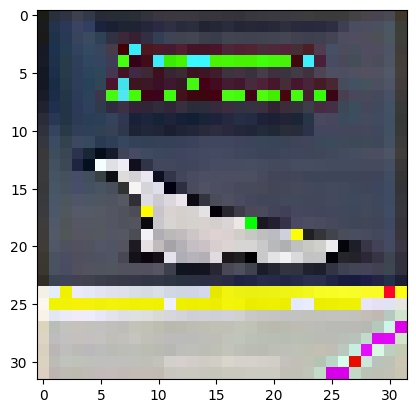

Actual label: [0]
Predicted label: 0





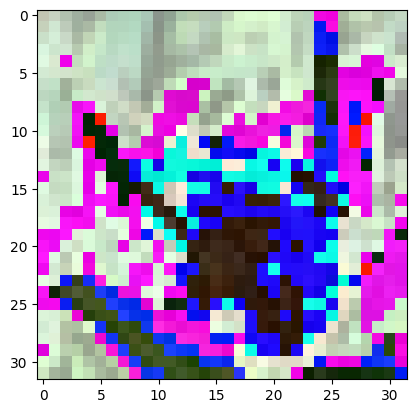

Actual label: [6]
Predicted label: 6





In [10]:
# Classify a few samples from the set
num_samples = 5
predictions = model.predict(test_images[:num_samples])
predicted_classes = np.argmax(predictions, axis=-1)

for i in range(num_samples):
  # Show image
  plt.imshow((test_images[i] * 255).astype('uint8'))
  plt.show()
  
  print("Actual label:", test_labels[i])
  print("Predicted label:", predicted_classes[i])
  print("\n\n")

In [9]:
# Save the model
model.save("CNNModel.h5")

# Load
model = models.load_model("CNNModel.h5")